In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

H: 0.0, lambda_P: 0.002777777777777778, P_solution: -0.9965203878247357
H: 0.010101010101010102, lambda_P: 0.002777777777777778, P_solution: -1.8749001651995374
H: 0.020202020202020204, lambda_P: 0.002777777777777778, P_solution: -3.781332948134727
H: 0.030303030303030304, lambda_P: 0.002777777777777778, P_solution: -10.222074165079299
H: 0.04040404040404041, lambda_P: 0.002777777777777778, P_solution: 43.44498833430765
H: 0.05050505050505051, lambda_P: 0.002777777777777778, P_solution: 9.139702976141352
H: 0.06060606060606061, lambda_P: 0.002777777777777778, P_solution: 5.739982422620509
H: 0.07070707070707072, lambda_P: 0.002777777777777778, P_solution: 4.461849427771679
H: 0.08080808080808081, lambda_P: 0.002777777777777778, P_solution: 3.7984095989572912
H: 0.09090909090909091, lambda_P: 0.002777777777777778, P_solution: 3.3971290053628524
H: 0.10101010101010102, lambda_P: 0.002777777777777778, P_solution: 3.132136845508253
H: 0.11111111111111112, lambda_P: 0.002777777777777778, P_

c:\tools\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


H: 0.8484848484848485, lambda_P: 0.005555555555555556, P_solution: -0.8361708885618395
H: 0.8585858585858587, lambda_P: 0.005555555555555556, P_solution: -0.819443094972859
H: 0.8686868686868687, lambda_P: 0.005555555555555556, P_solution: -0.8035736103236946
H: 0.8787878787878789, lambda_P: 0.005555555555555556, P_solution: -0.7885104103980343
H: 0.888888888888889, lambda_P: 0.005555555555555556, P_solution: -0.7742053542989834
H: 0.8989898989898991, lambda_P: 0.005555555555555556, P_solution: -0.7606138309840613
H: 0.9090909090909092, lambda_P: 0.005555555555555556, P_solution: -0.7476944436276117
H: 0.9191919191919192, lambda_P: 0.005555555555555556, P_solution: -0.7354087271942807
H: 0.9292929292929294, lambda_P: 0.005555555555555556, P_solution: -0.7237208952374298
H: 0.9393939393939394, lambda_P: 0.005555555555555556, P_solution: -0.7125976124716368
H: 0.9494949494949496, lambda_P: 0.005555555555555556, P_solution: -0.7020077901244174
H: 0.9595959595959597, lambda_P: 0.0055555555

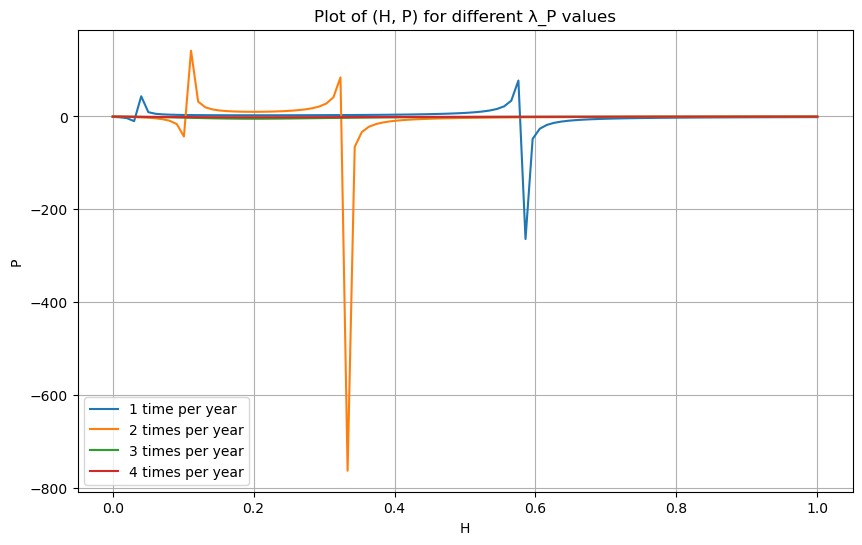

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
beta_STI_0 = 0.0016 * 5
psi = 0.9
mu = 1.0 / 45.0 / 360.0
gamma = 1.0 / 1.32 / 360.0
C = 50
beta_HIV = 0.6341 / 360.0
m_max = 0.8
H_threshold = 0.1
m_epsilon = 0.01

args = {
    "min_exp": 0.0,
    "max_exp": 1,
    "tau_exp": 0.2,
}


# Mitigation function
def m(args, H):
    """
    Exponential function with three parameters: minimum value, maximum value, and rate/tau.

    Args:
    args (dict): A dictionary containing the parameters 'H', 'min_exp', 'max_exp', and 'tau_exp'.

    Returns:
    float: The output of the exponential function.
    """
    H = H
    min_exp = args["min_exp"]
    max_exp = args["max_exp"]
    tau_exp = args["tau_exp"]

    return min_exp + (max_exp - min_exp) * (1 - np.exp(-H / tau_exp))


# Equation to solve
def lambda_P_eq(P, H, lambda_P):
    term1 = 1 / (beta_STI_0 * (1 - (m(args, H) * (1 - P))))
    term2 = C * (1 - m(args, H)) * beta_HIV * H * (1 - P)
    return ((psi / (term1 - (1 - psi) / mu)) - gamma - term2 - mu) - (lambda_P * P)


# Generate H values
H_values = np.linspace(0, 1, 100)

# Lambda values to consider
lambda_values = [1 / 360, 2 / 360, 3 / 360, 4 / 360]
lambda_labels = [
    "1 time per year",
    "2 times per year",
    "3 times per year",
    "4 times per year",
]

# Plotting and solving
plt.figure(figsize=(10, 6))

for lambda_P, label in zip(lambda_values, lambda_labels):
    P_values = []
    for H in H_values:
        # Initial guess for P
        P_initial_guess = 0.9

        # Solve for P
        P_solution = fsolve(lambda P: lambda_P_eq(P, H, lambda_P), P_initial_guess)

        # Print the solution for P
        print(f"H: {H}, lambda_P: {lambda_P}, P_solution: {P_solution[0]}")

        P_values.append(P_solution[0])
        # # Ensure P is in the range [0, 1]
        # if 0 <= P_solution[0] <= 1:
        #     P_values.append(P_solution[0])
        # else:
        #     P_values.append(np.nan)  # Mark as invalid

    plt.plot(H_values, P_values, label=label)

plt.xlabel("H")
plt.ylabel("P")
plt.title("Plot of (H, P) for different λ_P values")
plt.legend()
plt.grid(True)
plt.show()